# Library

In [ ]:
import pandas as pd
import random as rand
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Import Data & Exploration

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=13b6geTdOLy70KNo1T7IZGsA5A9FXI-IZ" -O kendaraan_test.csv
!wget "https://drive.google.com/uc?export=download&id=1IBFKANxOSC7j8yDJdrCKON-iZcoHG1Bn" -O kendaraan_train.csv

--2021-05-04 03:44:48--  https://drive.google.com/uc?export=download&id=13b6geTdOLy70KNo1T7IZGsA5A9FXI-IZ
Resolving drive.google.com (drive.google.com)... 173.194.202.100, 173.194.202.139, 173.194.202.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.202.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ukjqts19pld5fa8j7rt66lh8du6i7s6j/1620099825000/11451696578475608592/*/13b6geTdOLy70KNo1T7IZGsA5A9FXI-IZ?e=download [following]
--2021-05-04 03:44:50--  https://doc-14-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ukjqts19pld5fa8j7rt66lh8du6i7s6j/1620099825000/11451696578475608592/*/13b6geTdOLy70KNo1T7IZGsA5A9FXI-IZ?e=download
Resolving doc-14-3o-docs.googleusercontent.com (doc-14-3o-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-14-3o-docs.googleusercontent.com (do

In [ ]:
df_train = pd.read_csv('kendaraan_train.csv')
df_test = pd.read_csv('kendaraan_test.csv')

print(df_train.head())
print(df_test.head())

   id Jenis_Kelamin  Umur  ...  Kanal_Penjualan  Lama_Berlangganan  Tertarik
0   1        Wanita  30.0  ...            152.0               97.0         0
1   2          Pria  48.0  ...             29.0              158.0         0
2   3           NaN  21.0  ...            160.0              119.0         0
3   4        Wanita  58.0  ...            124.0               63.0         0
4   5          Pria  50.0  ...             88.0              194.0         0

[5 rows x 12 columns]
  Jenis_Kelamin  Umur  SIM  ...  Kanal_Penjualan  Lama_Berlangganan Tertarik
0        Wanita    49    1  ...               26                145        0
1          Pria    22    1  ...              152                241        0
2          Pria    24    1  ...              152                 62        0
3          Pria    46    1  ...              124                 34        0
4          Pria    35    1  ...              152                229        0

[5 rows x 11 columns]


In [ ]:
print(df_train.info())
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             No

# Preprocessing

In [ ]:
df_train.drop(['id'], inplace=True, axis=1)
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## convert object into int

In [ ]:
# Replace Umur_Kendaraan to Integer
df_train.replace(['< 1 Tahun','1-2 Tahun', '> 2 Tahun'],[0,1,2],inplace=True)
df_test.replace(['< 1 Tahun','1-2 Tahun', '> 2 Tahun'],[0,1,2],inplace=True)
# Replace Jenis Kelamin to Integer
df_train.replace(['Wanita', 'Pria'],[0,1],inplace=True)
df_test.replace(['Wanita', 'Pria'],[0,1],inplace=True)

# Replace Kendaraan_Rusak to Integer
df_train.replace(['Tidak', 'Pernah'],[0,1],inplace=True)
df_test.replace(['Tidak', 'Pernah'],[0,1],inplace=True)


## Missing Value

In [ ]:
df_train.dropna(axis=0, how='any', inplace=True)
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
5,1.0,21.0,1.0,35.0,1.0,0.0,0.0,22735.0,152.0,171.0,0
8,0.0,20.0,1.0,8.0,1.0,0.0,0.0,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


## Split Dataset

In [ ]:
# Data Train
X_train = df_train.drop('Tertarik', axis=1)
y_train = df_train['Tertarik'].values

# Data Test
X_test = df_test.drop('Tertarik', axis=1)
y_test = df_test['Tertarik'].values

display(X_train.shape)
display(X_test.shape)

(171068, 10)

(47639, 10)

In [ ]:
X = df_train[df_train.columns[:10]]
y = df_train['Tertarik']

In [ ]:
# SCALLING

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



# KNN Classification

## KNN Model

### Predict optimal K value

Maximum accuracy:- 0.8770125317491971 at K = 30


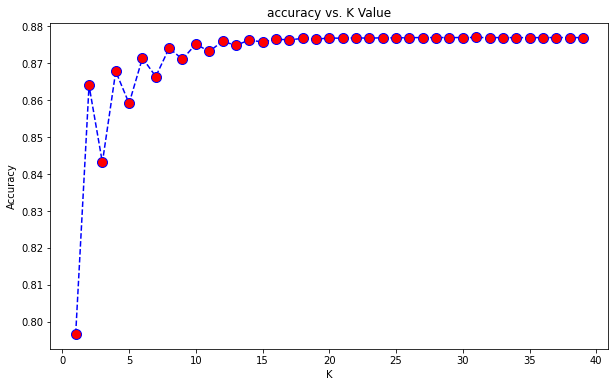

In [ ]:
acc = []

for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
optimalK = acc.index(max(acc))
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",optimalK)

### Build KNN classification model with optimal K value

In [ ]:
model = KNeighborsClassifier(n_neighbors = optimalK)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

## Prediction

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Accuration

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

In [ ]:
cls_report = classification_report(y_test, y_pred)

print(f'classification report: \n{cls_report}')

# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV



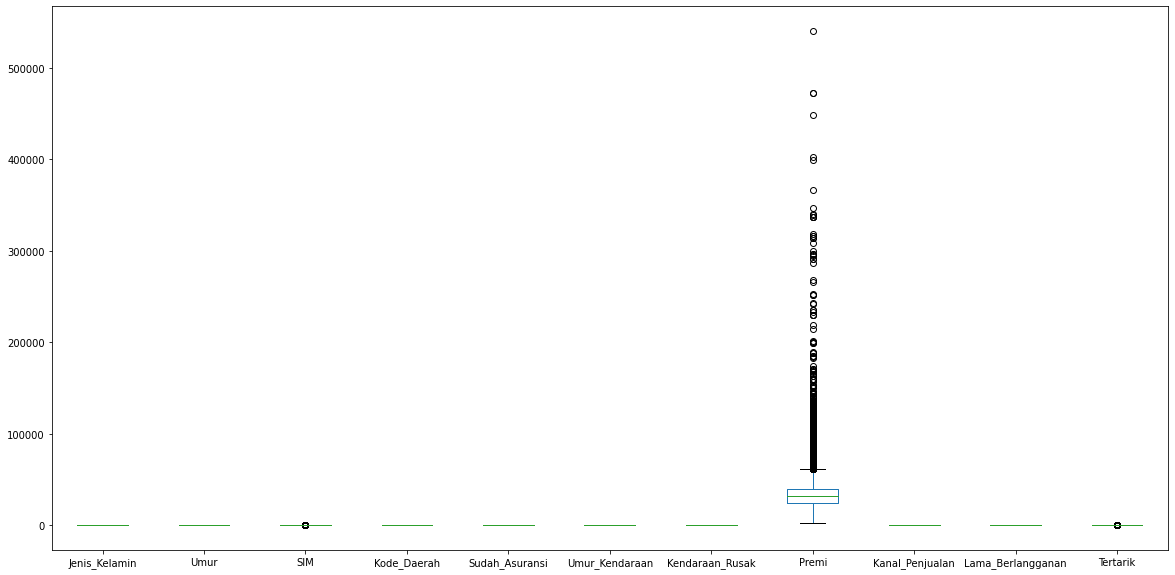

In [ ]:
df_train.plot(kind='box', figsize=(20,10) )

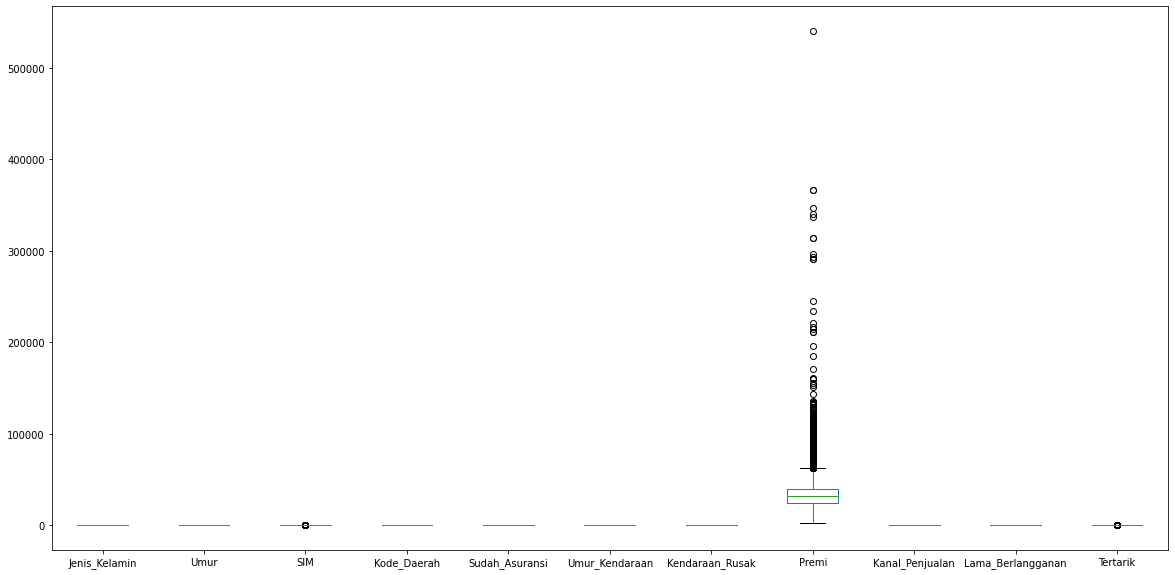

In [ ]:
df_test.plot(kind='box', figsize=(20,10) )

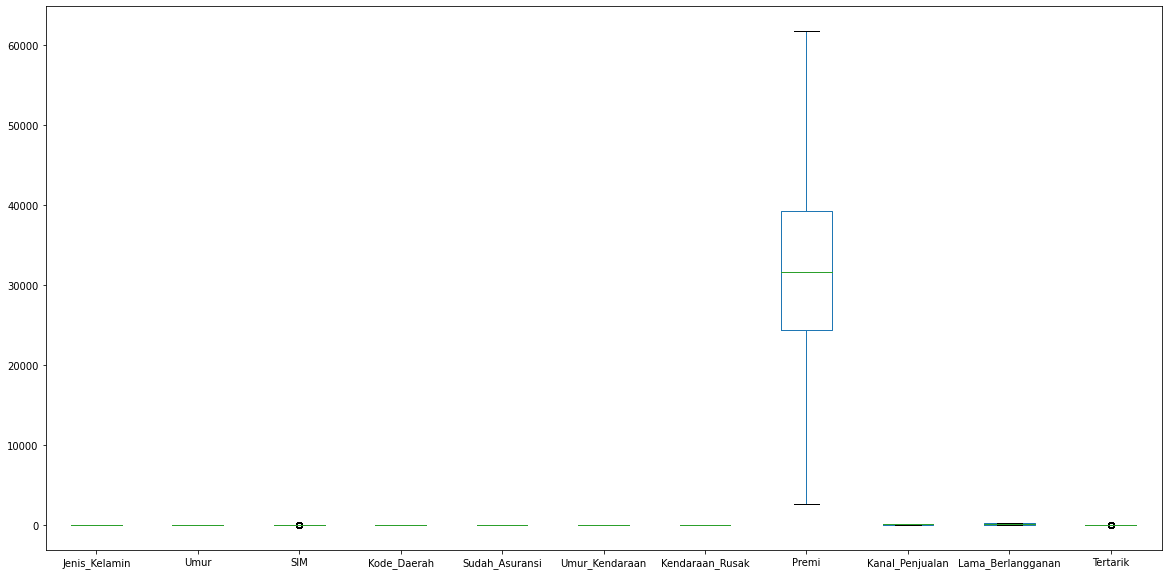

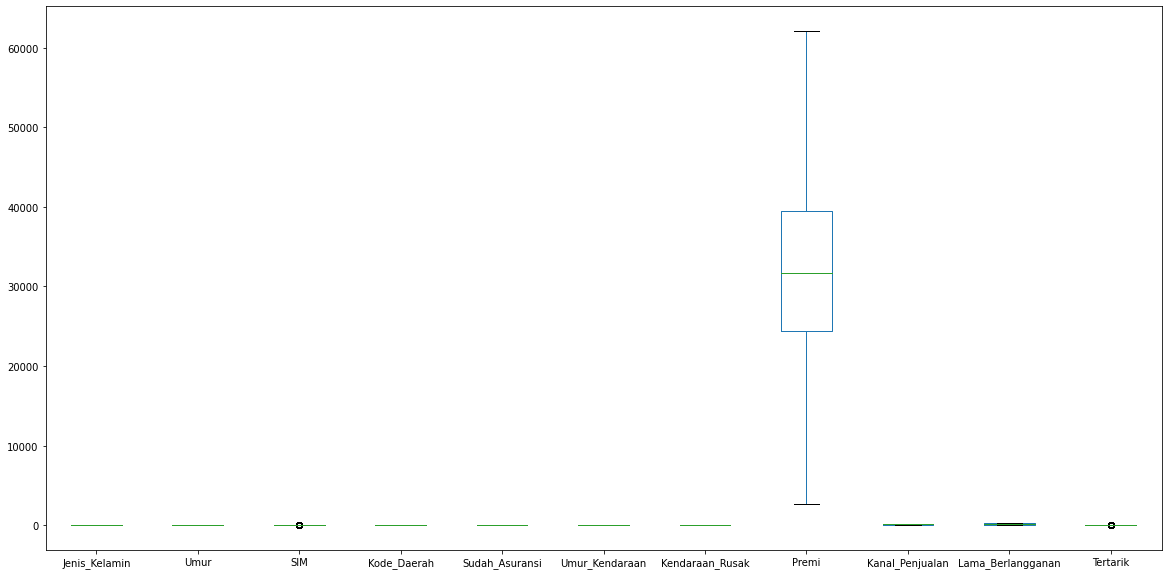

In [ ]:
# handling Outlier Premi Df_train

q1 = df_train['Premi'].quantile(0.25)
q3 = df_train['Premi'].quantile(0.75)
iqr = q3 - q1

lbound = q1 - (iqr * 1.5)
ubound = q3 + (iqr * 1.5)

df_train['Premi'] = df_train['Premi'].apply(lambda x: ubound if x > ubound else lbound if x < lbound else x)


df_train.plot(kind='box', figsize=(20,10) )

# handling Outlier Premi Df_test

q1 = df_test['Premi'].quantile(0.25)
q3 = df_test['Premi'].quantile(0.75)
iqr = q3 - q1

lbound = q1 - (iqr * 1.5)
ubound = q3 + (iqr * 1.5)

df_test['Premi'] = df_test['Premi'].apply(lambda x: ubound if x > ubound else lbound if x < lbound else x)


df_test.plot(kind='box', figsize=(20,10) )

In [ ]:
print(df_train.shape)
print(df_test.shape)

(171068, 11)
(47639, 11)


In [ ]:
df_train.dropna(axis=0, how='any', inplace=True)
df_test.dropna(axis=0, how='any', inplace=True)

print(df_train.shape)
print(df_test.shape)

(171068, 11)
(47639, 11)


In [ ]:
# SCALLING

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



In [ ]:
clf = DecisionTreeClassifier()

# Train decision Tree classifier
clf = clf.fit(X_train, y_train)


# Predict hasil dari dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy : ", metrics.classification_report(y_test, y_pred))

Accuracy :                precision    recall  f1-score   support

           0       0.90      0.89      0.90     41778
           1       0.29      0.31      0.30      5861

    accuracy                           0.82     47639
   macro avg       0.60      0.60      0.60     47639
weighted avg       0.83      0.82      0.82     47639



In [ ]:
# Decision Tree with Tuning Hyperparameter

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = {"criterion":criterion,
              "max_depth":max_depth}
clf = DecisionTreeClassifier()

clf_GS = GridSearchCV(clf, parameters)



# Train decision Tree classifier
clf_GS.fit(X_train, y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [ ]:
clf = clf_GS.best_estimator_

# Train decision Tree classifier
clf = clf.fit(X_train, y_train)


# Predict hasil dari dataset
y_pred = clf.predict(X_test)

print("Accuracy : ", metrics.classification_report(y_test, y_pred))

Accuracy :                precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.00      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.44      0.50      0.47     47639
weighted avg       0.77      0.88      0.82     47639



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
np.array(y_pred)

array([0, 0, 0, ..., 0, 0, 0])